<a href="https://colab.research.google.com/github/Dee-6777/Prediction-of-Engineering-graduate-Salary-using-SVR/blob/main/Support_Vector_Machine(SVR)_and_Project_2_Prediction_of_Engineering_graduate_Salary_using_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Problem Statement

Given a dataset which represents the parameters of an Engineering graduate based on which the salary will be given to him/her. You need to predict the Engineering graduate salary based on the provided features.

# Importing the dataset

Link: https://drive.google.com/file/d/13fgjGI3uGlnEqefpZ72JsWLqXqveNKo1/view?usp=sharing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ShapeAI DST 11021 Oct-Jan Batch 2021-22/Datasets/Engineering_graduate_salary.csv')

# EDA - Exploratory Data Analysis

In [ ]:
df.head()

ID Gender         DOB  ...  nueroticism openess_to_experience  Salary
0  604399      f  1990-10-22  ...      0.14590                0.2889  445000
1  988334      m  1990-05-15  ...      0.52620               -0.2859  110000
2  301647      m  1989-08-21  ...     -0.29020               -0.2875  255000
3  582313      m  1991-05-04  ...      0.27270                0.4805  420000
4  339001      f  1990-10-30  ...      0.06223                0.1864  200000

[5 rows x 34 columns]

# Data Description
ID: A unique ID to identify a candidate

Salary: Annual CTC offered to the candidate (in INR)

Gender: Candidate's gender

DOB: Date of birth of the candidate

10percentage: Overall marks obtained in grade 10 examinations

10board: The school board whose curriculum the candidate followed in grade 10

12graduation: Year of graduation - senior year high school

12percentage: Overall marks obtained in grade 12 examinations

12board: The school board whose curriculum the candidate followed

CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate

CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.

Degree: Degree obtained/pursued by the candidate

Specialization: Specialization pursued by the candidate

CollegeGPA: Aggregate GPA at graduation

CollegeCityID: A unique ID to identify the city in which the college is located in.

CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.

CollegeState: Name of the state in which the college is located

GraduationYear: Year of graduation (Bachelor's degree)

English: Scores in AMCAT English section

Logical: Score in AMCAT Logical ability section

Quant: Score in AMCAT's Quantitative ability section

Domain: Scores in AMCAT's domain module

ComputerProgramming: Score in AMCAT's Computer programming section

ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section

ComputerScience: Score in AMCAT's Computer Science section

MechanicalEngg: Score in AMCAT's Mechanical Engineering section

ElectricalEngg: Score in AMCAT's Electrical Engineering section

TelecomEngg: Score in AMCAT's Telecommunication Engineering section

CivilEngg: Score in AMCAT's Civil Engineering section

conscientiousness: Scores in one of the sections of AMCAT's personality test

agreeableness: Scores in one of the sections of AMCAT's personality test

extraversion: Scores in one of the sections of AMCAT's personality test

nueroticism: Scores in one of the sections of AMCAT's personality test

openesstoexperience: Scores in one of the sections of AMCAT's personality test


In [ ]:
df.tail()

ID Gender         DOB  ...  nueroticism openess_to_experience  Salary
2993  103174      f  1989-04-17  ...      1.35490                0.0284  120000
2994  352811      f  1991-07-22  ...     -0.29020                0.5024  120000
2995  287070      m  1988-11-24  ...      0.06230                0.6603  385000
2996  317336      m  1988-08-25  ...     -1.46537                0.5419  530000
2997  993701      m  1992-05-27  ...      1.16010               -2.3937  200000

[5 rows x 34 columns]

In [ ]:
df.shape

(2998, 34)

In [ ]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [ ]:
len(df.columns)

34

In [ ]:
df.shape[1]

34

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [ ]:
df.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head(1)

ID Gender         DOB  ...  nueroticism openess_to_experience  Salary
0  604399      f  1990-10-22  ...       0.1459                0.2889  445000

[1 rows x 34 columns]

In [ ]:
Remove - ID, CollegeID, CollegeCityID, CollegeCityTier, CollegeState, 
Column - Age(Current Date(15), Month(12), Year(2021) - DOB)

In [ ]:
df.drop(['ID', 'CollegeID', 'CollegeCityID', 'CollegeCityTier', 'CollegeState'], axis=1, inplace=True)

In [ ]:
df.head(1)

Gender         DOB  10percentage  ... nueroticism  openess_to_experience  Salary
0      f  1990-10-22          87.8  ...      0.1459                 0.2889  445000

[1 rows x 29 columns]

In [ ]:
df.DOB = pd.to_datetime(df.DOB)

In [ ]:
import datetime

In [ ]:
def age(data):
  current_date = datetime.date.today()
  return current_date.year - data.year - ((current_date.month, current_date.day) < (data.month, data.day))

In [ ]:
df['Age'] = df.DOB.apply(lambda x : age(x))

In [ ]:
df.drop(['DOB'], axis=1, inplace=True)

In [ ]:
df.head()

Gender  10percentage  ...  Salary  Age
0      f         87.80  ...  445000   31
1      m         57.00  ...  110000   31
2      m         77.33  ...  255000   32
3      m         84.30  ...  420000   30
4      f         82.00  ...  200000   31

[5 rows x 29 columns]

In [ ]:
Age = df.pop('Age')

In [ ]:
df.insert(1, 'Age', Age)

In [ ]:
df.head(1)

Gender  Age  10percentage  ... nueroticism  openess_to_experience  Salary
0      f   31          87.8  ...      0.1459                 0.2889  445000

[1 rows x 29 columns]

In [ ]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

In [ ]:
df.Gender.value_counts()

m    2282
f     716
Name: Gender, dtype: int64

In [ ]:
# Convert
#  m -> 0
#  f -> 1

In [ ]:
df.Gender.replace(['m','f'], [0,1], inplace=True)

In [ ]:
df.head(1)

Gender  Age  10percentage  ... nueroticism  openess_to_experience  Salary
0       1   31          87.8  ...      0.1459                 0.2889  445000

[1 rows x 29 columns]

In [ ]:
# Find is there any value 0 in 10percentage
df[df['10percentage'] == 0]

Empty DataFrame
Columns: [Gender, Age, 10percentage, 10board, 12graduation, 12percentage, 12board, CollegeTier, Degree, Specialization, collegeGPA, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Salary]
Index: []

In [ ]:
df['10board'].unique()

array(['cbse', 'maharashtra state board,pune', 'icse', 'state board',
       'delhi board', '0', 'hse', 'board of school education harayana',
       'rbse', 'u p board', 'bse, odisha',
       'rajasthan board of secondary education', 'up board',
       'council for indian school certificate examination', 'kea',
       'uttar pradesh', 'board of secondary education,andhara pradesh',
       'wbbse', 'matriculation board',
       'board of secondary education - andhra pradesh', 'mp', 'up',
       'karnataka', 'ssc', 'kseeb', 'bse', 'gseb', 'uttar pradesh board',
       'matriculation', 'karnataka secondary education board',
       'maharastra board', 'tn state board',
       'board of secondary education', 'sslc',
       'board secondary  education',
       'karnataka secondary school of examination', 'metric',
       'maharashtra state board', 'maharashtra sate board', 'matric',
       'hbse', 'state', 'state boardmp board ',
       'karnataka board of higher education', 'hsce',
       '

In [ ]:
df['10board'].nunique()

221

In [ ]:
# Remove 10board & 12board
df.drop(['10board', '12board'], axis=1, inplace=True)

In [ ]:
df.head(2)

Gender  Age  10percentage  ...  nueroticism  openess_to_experience  Salary
0       1   31          87.8  ...       0.1459                 0.2889  445000
1       0   31          57.0  ...       0.5262                -0.2859  110000

[2 rows x 27 columns]

In [ ]:
# Find is there any value 0 in 12graduation
df[df['12graduation'] == 0]

Empty DataFrame
Columns: [Gender, Age, 10percentage, 12graduation, 12percentage, CollegeTier, Degree, Specialization, collegeGPA, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Salary]
Index: []

In [ ]:
# Change the name from 12graduation to Year_of_grad_12
df.rename(columns={'12graduation':'Year_of_grad_12'}, inplace=True)

In [ ]:
df.head(2)

Gender  Age  10percentage  ...  nueroticism  openess_to_experience  Salary
0       1   31          87.8  ...       0.1459                 0.2889  445000
1       0   31          57.0  ...       0.5262                -0.2859  110000

[2 rows x 27 columns]

In [ ]:
# Find is there any value 0 in 12percentage
df[df['12percentage'] == 0]

Empty DataFrame
Columns: [Gender, Age, 10percentage, Year_of_grad_12, 12percentage, CollegeTier, Degree, Specialization, collegeGPA, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Salary]
Index: []

In [ ]:
df.CollegeTier.unique()

array([1, 2])

In [ ]:
df.CollegeTier.value_counts()

2    2772
1     226
Name: CollegeTier, dtype: int64

In [ ]:
df.Degree.unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [ ]:
'''Covert
B.Tech/B.E. -> 0
M.Tech./M.E. -> 1
MCA -> 2
M.Sc. (Tech.) -> 3
'''

In [ ]:
df.replace(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],[0,1,2,3], inplace=True)

In [ ]:
df.Degree.unique()

array([0, 1, 2, 3])

In [ ]:
df.Degree.value_counts()

0    2757
2     200
1      40
3       1
Name: Degree, dtype: int64

In [ ]:
df.head()

Gender  Age  10percentage  ...  nueroticism  openess_to_experience  Salary
0       1   31         87.80  ...      0.14590                 0.2889  445000
1       0   31         57.00  ...      0.52620                -0.2859  110000
2       0   32         77.33  ...     -0.29020                -0.2875  255000
3       0   30         84.30  ...      0.27270                 0.4805  420000
4       1   31         82.00  ...      0.06223                 0.1864  200000

[5 rows x 27 columns]

In [ ]:
df.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

In [ ]:
df.Specialization.nunique()

42

In [ ]:
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
information science engineering                 18
electronics and instrumentation engineering     18
instrumentation and control engineering         18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [ ]:
arr = df.Specialization.value_counts()


def spec(x):
  if x in arr[arr <= 10]:
    return 'other'
  else:
    return x

In [ ]:
df.Specialization = df.Specialization.apply(spec)

In [ ]:
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
other                                           76
electrical engineering                          63
electronics & instrumentation eng               24
information science engineering                 18
instrumentation and control engineering         18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

In [ ]:
df.Specialization.nunique()

17

In [ ]:
df.replace(df.Specialization.unique(),[i for i in range(17)], inplace=True)

In [ ]:
df.head(2)

Gender  Age  10percentage  ...  nueroticism  openess_to_experience  Salary
0       1   31          87.8  ...       0.1459                 0.2889  445000
1       0   31          57.0  ...       0.5262                -0.2859  110000

[2 rows x 27 columns]

In [ ]:
# Find is there any value 0 in GraduationYear
df[df['GraduationYear'] == 0]

Gender  Age  10percentage  ...  nueroticism  openess_to_experience  Salary
961       0   29          89.0  ...      -0.3612                 -1.244  325000

[1 rows x 27 columns]

In [ ]:
df.GraduationYear.describe()

count    2998.000000
mean     2011.939960
std        36.780582
min         0.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2017.000000
Name: GraduationYear, dtype: float64

In [ ]:
# Find GraduationYear?
# Mean - 2011
# Median - 2013
# Mode - 2013

In [ ]:
df.GraduationYear.mode()

0    2013
dtype: int64

In [ ]:
newdf = df.copy()

In [ ]:
newdf.GraduationYear.replace(0,2013, inplace=True)

In [ ]:
newdf[newdf['GraduationYear'] == 0]

Empty DataFrame
Columns: [Gender, Age, 10percentage, Year_of_grad_12, 12percentage, CollegeTier, Degree, Specialization, collegeGPA, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Salary]
Index: []

In [ ]:
df.GraduationYear.replace(0,2013, inplace=True)

In [ ]:
df.head()

Gender  Age  10percentage  ...  nueroticism  openess_to_experience  Salary
0       1   31         87.80  ...      0.14590                 0.2889  445000
1       0   31         57.00  ...      0.52620                -0.2859  110000
2       0   32         77.33  ...     -0.29020                -0.2875  255000
3       0   30         84.30  ...      0.27270                 0.4805  420000
4       1   31         82.00  ...      0.06223                 0.1864  200000

[5 rows x 27 columns]

In [ ]:
df.English.describe()

count    2998.000000
mean      501.066378
std       105.304512
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64

In [ ]:
df.Logical.describe()

count    2998.000000
mean      500.431621
std        87.299850
min       195.000000
25%       441.250000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64

In [ ]:
df.Quant.describe()

count    2998.000000
mean      514.137759
std       122.194955
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64

In [ ]:
df.Domain.describe()

count    2998.000000
mean        0.508458
std         0.463373
min        -1.000000
25%         0.342315
50%         0.622643
75%         0.835612
max         0.999910
Name: Domain, dtype: float64

In [ ]:
# Change -1 to NaN in the columns - 
'''
Domain	
ComputerProgramming	
ElectronicsAndSemicon	
ComputerScience	
MechanicalEngg	
ElectricalEngg	
TelecomEngg	CivilEngg
'''

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
arr = ['Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

In [ ]:
for i in arr:
  newdf[f'{i}'].replace(-1, np.NaN, inplace=True)

In [ ]:
newdf.head()

Gender  Age  10percentage  ...  nueroticism  openess_to_experience  Salary
0       1   31         87.80  ...      0.14590                 0.2889  445000
1       0   31         57.00  ...      0.52620                -0.2859  110000
2       0   32         77.33  ...     -0.29020                -0.2875  255000
3       0   30         84.30  ...      0.27270                 0.4805  420000
4       1   31         82.00  ...      0.06223                 0.1864  200000

[5 rows x 27 columns]

In [ ]:
for i in arr:
  print("Mean: ",newdf[f'{i}'].mean())
  print("Median: ",newdf[f'{i}'].median())
  print("Mode: ",newdf[f'{i}'].mode())

Mean:  0.6042411529327225
Median:  0.6359787564567939
Mode:  0    0.622643
dtype: float64
Mean:  449.55366269165245
Median:  445.0
Mode:  0    445.0
dtype: float64
Mean:  335.98265895953756
Median:  333.0
Mode:  0    333.0
dtype: float64
Mean:  406.50142857142856
Median:  407.0
Mode:  0    407.0
dtype: float64
Mean:  402.0267379679144
Median:  393.0
Mode:  0    366.0
dtype: float64
Mean:  423.3360655737705
Median:  420.0
Mode:  0    420.0
dtype: float64
Mean:  349.8795620437956
Median:  340.0
Mode:  0    393.0
dtype: float64
Mean:  338.8076923076923
Median:  331.0
Mode:  0    292.0
1    356.0
dtype: float64


In [ ]:
for i in arr:
  newdf[f'{i}'].replace(np.NaN, newdf[f'{i}'].median(), inplace=True)

In [ ]:
newdf.head()

Gender  Age  10percentage  ...  nueroticism  openess_to_experience  Salary
0       1   31         87.80  ...      0.14590                 0.2889  445000
1       0   31         57.00  ...      0.52620                -0.2859  110000
2       0   32         77.33  ...     -0.29020                -0.2875  255000
3       0   30         84.30  ...      0.27270                 0.4805  420000
4       1   31         82.00  ...      0.06223                 0.1864  200000

[5 rows x 27 columns]

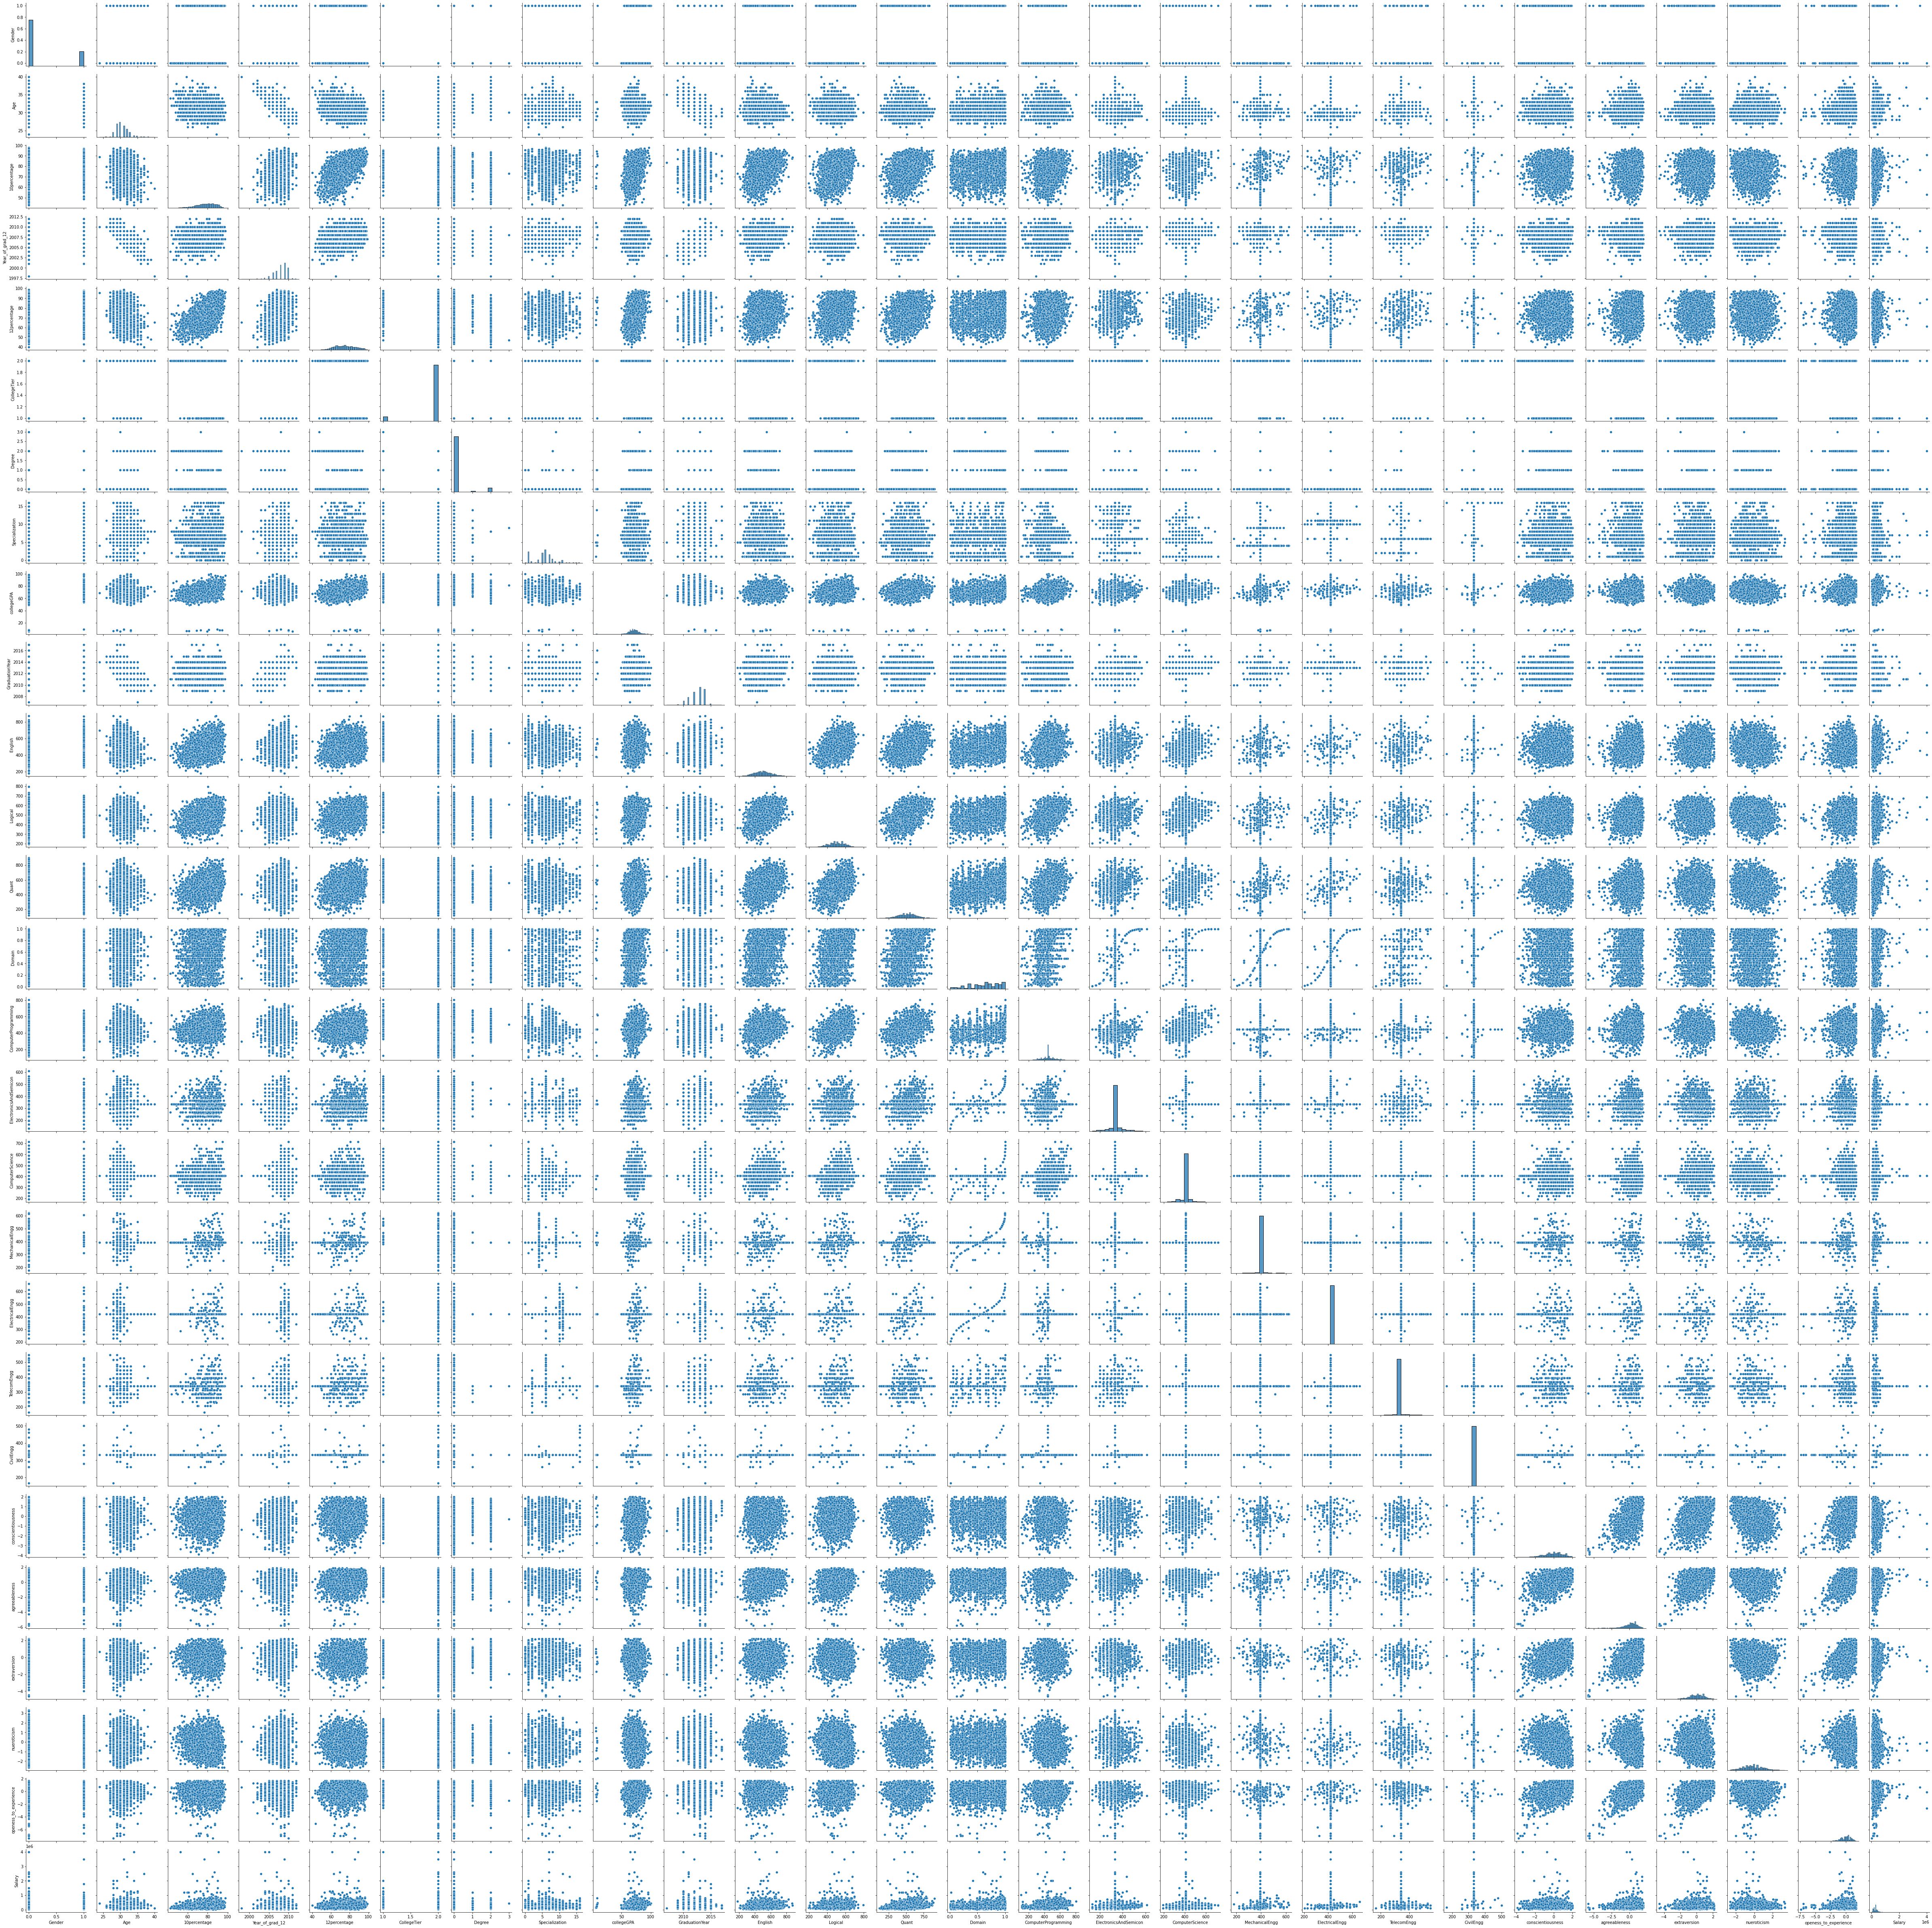

In [ ]:
sns.pairplot(newdf)

In [ ]:
newdf.corr()

Gender       Age  ...  openess_to_experience    Salary
Gender                 1.000000 -0.042421  ...               0.085737 -0.038933
Age                   -0.042421  1.000000  ...               0.015817  0.152559
10percentage           0.165269 -0.239713  ...               0.034869  0.181414
Year_of_grad_12        0.058597 -0.865929  ...              -0.015313 -0.161793
12percentage           0.139944 -0.259853  ...               0.007041  0.172755
CollegeTier            0.035484 -0.018802  ...              -0.029322 -0.177975
Degree                -0.007345  0.323688  ...              -0.002137 -0.027314
Specialization         0.002944  0.240631  ...              -0.021832  0.030333
collegeGPA             0.169005 -0.088748  ...               0.013691  0.131912
GraduationYear        -0.015422 -0.747829  ...              -0.016620 -0.214592
English               -0.012799 -0.113164  ...               0.073529  0.179668
Logical               -0.015139 -0.094208  ...               0.049579  0.193647
Quant                 -0.099537 -0.031801  ...               0.024627  0.239345
Domain                -0.017984  0.034735  ...               0.023034  0.185306
ComputerProgramming   -0.050347 -0.006935  ...               0.029405  0.191770
ElectronicsAndSemicon -0.026398 -0.003128  ...               0.003859  0.046484
ComputerScience       -0.021246 -0.006887  ...              -0.004723  0.057143
MechanicalEngg        -0.002854 -0.018757  ...               0.013694  0.050126
ElectricalEngg        -0.010968 -0.003150  ...               0.013192  0.030119
TelecomEngg            0.018661 -0.007784  ...               0.012774  0.015634
CivilEngg              0.017295  0.012539  ...               0.001955  0.035193
conscientiousness      0.074675 -0.105712  ...               0.403040 -0.047134
agreeableness          0.078982 -0.025273  ...               0.592820  0.074756
extraversion           0.005639 -0.042838  ...               0.447718 -0.004930
nueroticism            0.006324  0.078369  ...              -0.066933 -0.069983
openess_to_experience  0.085737  0.015817  ...               1.000000  0.000940
Salary                -0.038933  0.152559  ...               0.000940  1.000000

[27 rows x 27 columns]

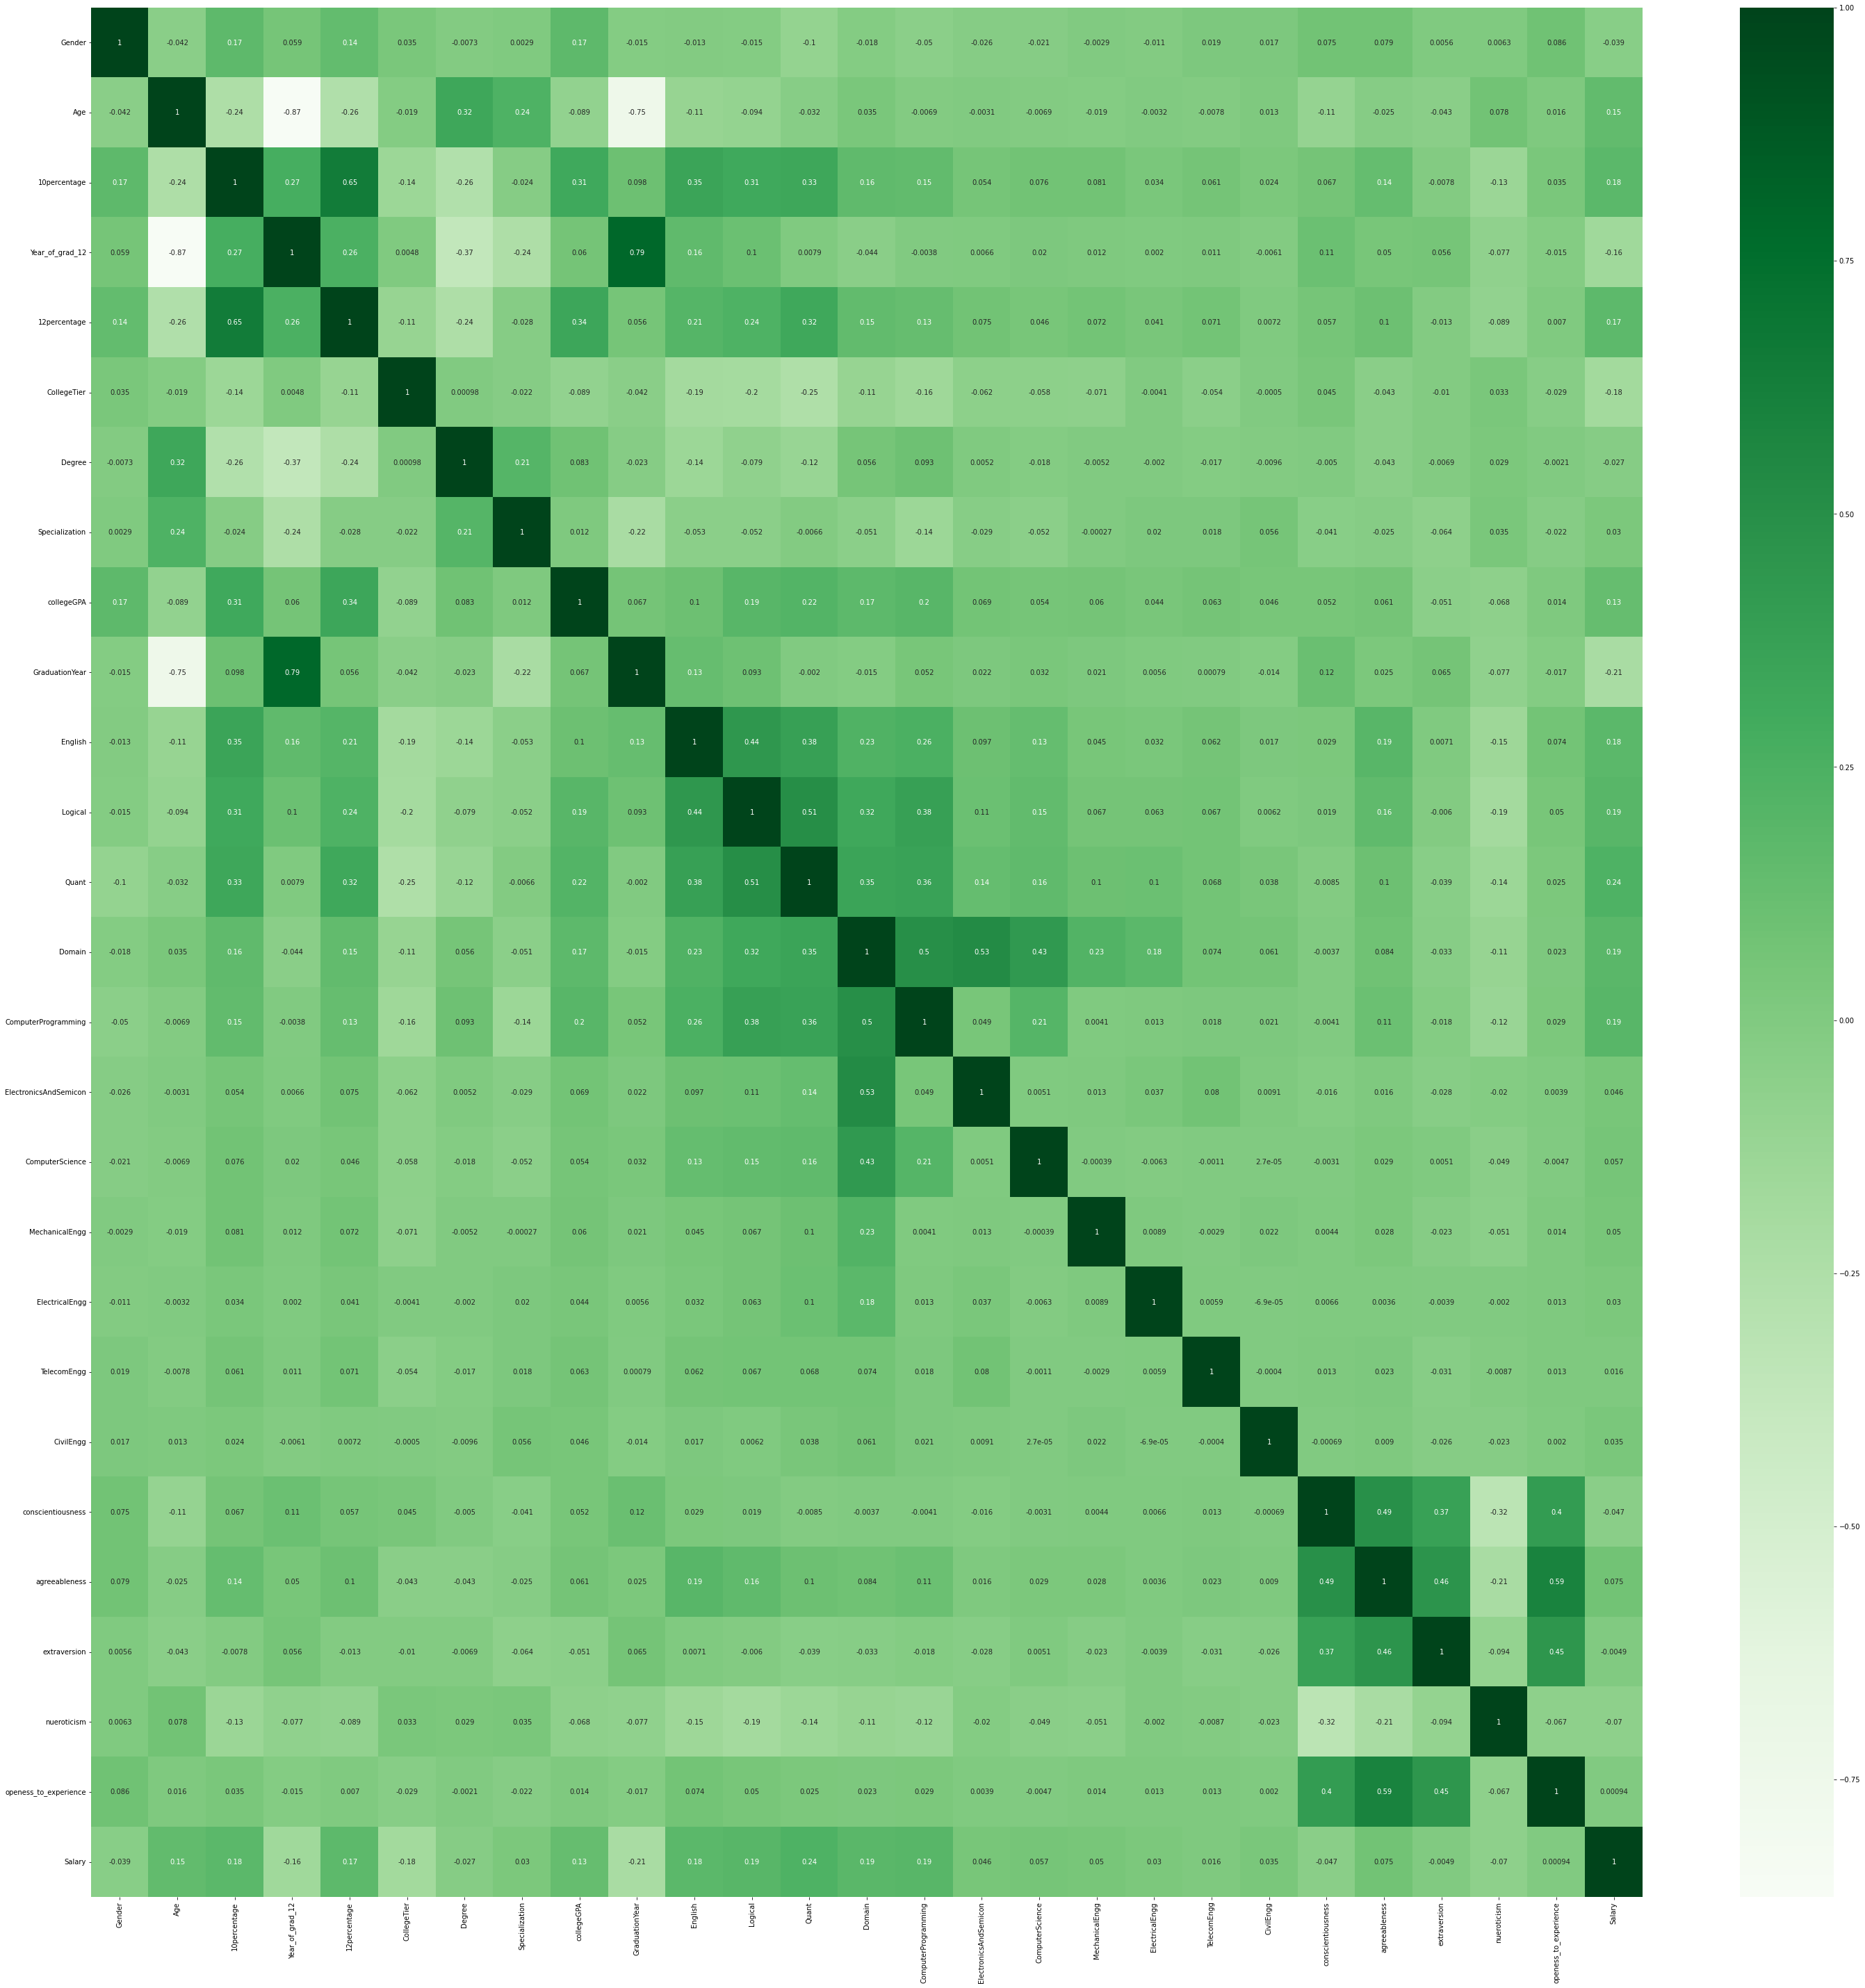

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(newdf.corr(), annot=True, cmap='Greens')

In [ ]:
X = newdf.drop(['Salary'], axis=1)
y = newdf['Salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
comp = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [ ]:
comp.corr()

Actual  Predicted
Actual     1.000000   0.264855
Predicted  0.264855   1.000000

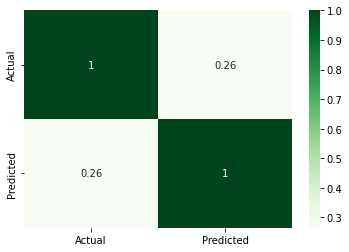

In [ ]:
sns.heatmap(comp.corr(), annot=True, cmap='Greens')

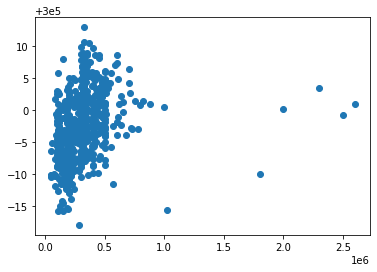

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

-0.00320738713818991